In [1]:
# import torch
# from torch import nn
# from torch.utils.data import Dataset, DataLoader

# import os
# import glob
# import time
# import datetime as dt
# import pandas as pd
# import numpy as np
# import xarray as xr
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.markers import MarkerStyle
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature

# from FunctionsAndClasses.HRRR_URMA_Datasets_AllVars import *
# from FunctionsAndClasses.SR_UNet_simple import *
# from FunctionsAndClasses.DefineModelAttributes import *
# from FunctionsAndClasses.StatObjectConstructor import *
# from FunctionsAndClasses.utils import *
# from FunctionsAndClasses.CONSTANTS import *

from HEADER_SCRIPTS import *


In [2]:
# filenames = os.listdir(f"/scratch/RTMA/alex.schein/CNN_Main/Trained_models/MAE_Loss")

# for filename in filenames:
#     model_attrs = DefineModelAttributes(is_train=False)
#     model_attrs.set_model_attrs_from_savename(filename)

#     print(filename)
#     for TARG_VAR in model_attrs.target_vars:
#         statobj_smartinit = ConstructStatObject(is_smartinit=True, target_var=TARG_VAR)
#         statobj_model = ConstructStatObject(is_smartinit=False, current_model_attrs=model_attrs, target_var=TARG_VAR)
#         statobj_model.trained_models_directory = f"/scratch/RTMA/alex.schein/CNN_Main/Trained_models/MAE_Loss"

#         statobj_smartinit.calc_domain_avg_RMSE_alltimes()
#         statobj_model.calc_domain_avg_RMSE_alltimes()

#         # PLOT_SAVE_DIR should change if the normalization scheme changes, or other changes implemented (check before running)
#         plot_model_vs_smartinit_RMSE(model_attrs, 
#                                      statobj_model, 
#                                      statobj_smartinit, 
#                                      units_str=statobj_smartinit.varname_units_dict[TARG_VAR], 
#                                      to_save=False, 
#                                      PLOT_SAVE_DIR=f"/scratch/RTMA/alex.schein/CNN_Main/Plots/f01/SmartinitComparisonPlots")


In [3]:
C = CONSTANTS()

In [4]:
VAR = 't2m'

In [9]:
model_attrs = DefineModelAttributes(is_train=False)#, predictor_vars=[VAR], target_vars=[VAR])

filename = f"{C.DIR_TRAINED_MODELS}/ATTENTION_SIMPLE_BS24_NE50_tD_pred(t2m)_targ(t2m)_TEMP.pt" #ATTENTION_SIMPLE_BS24_NE30_tD_pred(t2m)_targ(t2m).pt"

model_attrs.set_model_attrs_from_savename(filename)
model_attrs.create_save_name()

model_attrs.savename = f"ATTENTION_SIMPLE_{model_attrs.savename}_TEMP"

model_attrs.create_dataset()

Making dataset for model ATTENTION_SIMPLE_BS24_NE50_tD_pred(t2m)_targ(t2m)_TEMP
is_train = False
Terrain normalization done for ['diff']
Predictor data for t2m loaded. Time taken = 0.0 sec
Target data for t2m loaded. Time taken = 0.0 sec
DATASET CONSTRUCTION DONE


In [10]:
statobj_smartinit = ConstructStatObject(is_smartinit=True, target_var=VAR)
statobj_model = ConstructStatObject(is_smartinit=False, current_model_attrs=model_attrs, target_var=VAR)

In [11]:
statobj_smartinit.calc_domain_avg_RMSE_alltimes()

t2m RMSE data for Smartinit exists on disk
t2m RMSE data has been read in


In [12]:
statobj_model.calc_domain_avg_RMSE_alltimes()

Calculating RMSE for all times (t2m, ATTENTION_SIMPLE_BS24_NE50_tD_pred(t2m)_targ(t2m)_TEMP)
0% done
5% done
10% done
15% done
20% done
25% done
30% done
35% done
40% done
45% done
50% done
55% done
60% done
65% done
70% done
75% done
80% done
85% done
90% done
95% done
100% done


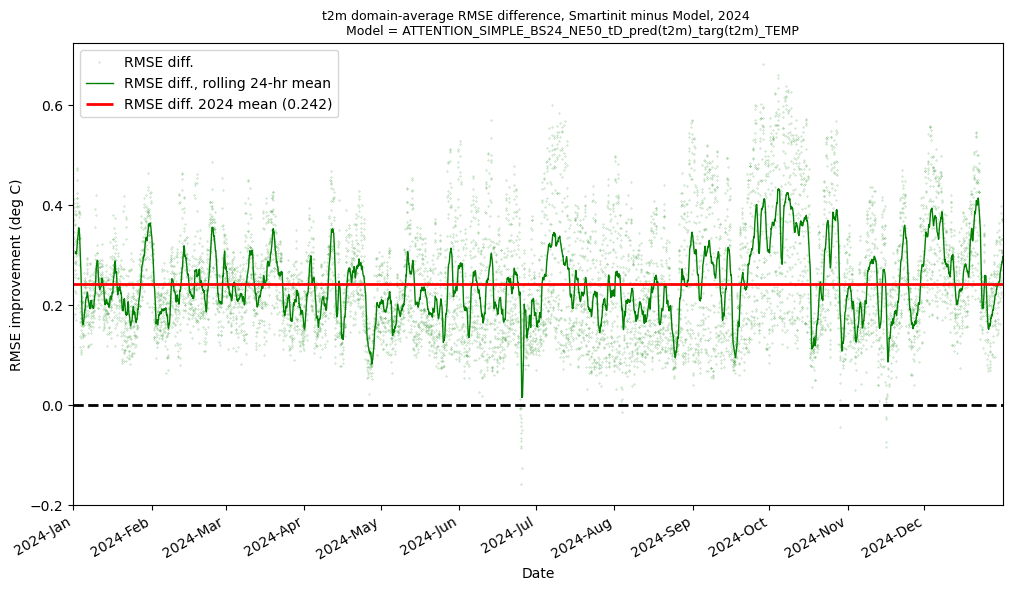

In [13]:
plot_model_vs_smartinit_RMSE(model_attrs, 
                             statobj_model, 
                             statobj_smartinit, 
                             units_str=statobj_smartinit.varname_units_dict[VAR], 
                             to_save=False, 
                             PLOT_SAVE_DIR=f"/{C.DIR_UNET_MAIN}/Plots/")

In [14]:
len(np.argwhere((np.array(statobj_smartinit.domain_avg_rmse_alltimes_list) - statobj_model.domain_avg_rmse_alltimes_list)<0))

23